In [8]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# from google.colab import drive
# drive.mount("/content/gdrive")
pre_path = "" # '/content/gdrive/My Drive/AN2DL_HW2/'

In [9]:
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 80% !important; }</style>"))
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 42
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import numpy as np
np.random.seed(seed)
import logging
import random
random.seed(seed)
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)
#from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
import cv2
from statsmodels.tsa.stattools import acf
#%matplotlib widget
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import load_model


2.15.0


In [4]:
datas = np.load(pre_path + 'training_dataset/training_data.npy', allow_pickle=True)
indexes = np.load(pre_path +'training_dataset/valid_periods.npy', allow_pickle=True)
labels = np.load(pre_path +'training_dataset/categories.npy', allow_pickle=True)

In [10]:
category = 'E'
encodings = {'A':np.array([1,0,0,0,0,0]).reshape(1,-1),
            'B':np.array([0,1,0,0,0,0]).reshape(1,-1),
            'C':np.array([0,0,1,0,0,0]).reshape(1,-1),
            'D':np.array([0,0,0,1,0,0]).reshape(1,-1),
            'E':np.array([0,0,0,0,1,0]).reshape(1,-1),
            'F':np.array([0,0,0,0,0,1]).reshape(1,-1),
           }
encod = encodings[category]
window = 200
forecast_window = 18
model = load_model(pre_path +'models_kudret/diff_model_v4_conv_dense_deep.h5')
label = labels == category

In [27]:
prediction[:8]

array([0.7258647, 0.7489129, 0.7426482, 0.7513671, 0.7224332, 0.7521461,
       0.7332064, 0.7138945], dtype=float32)

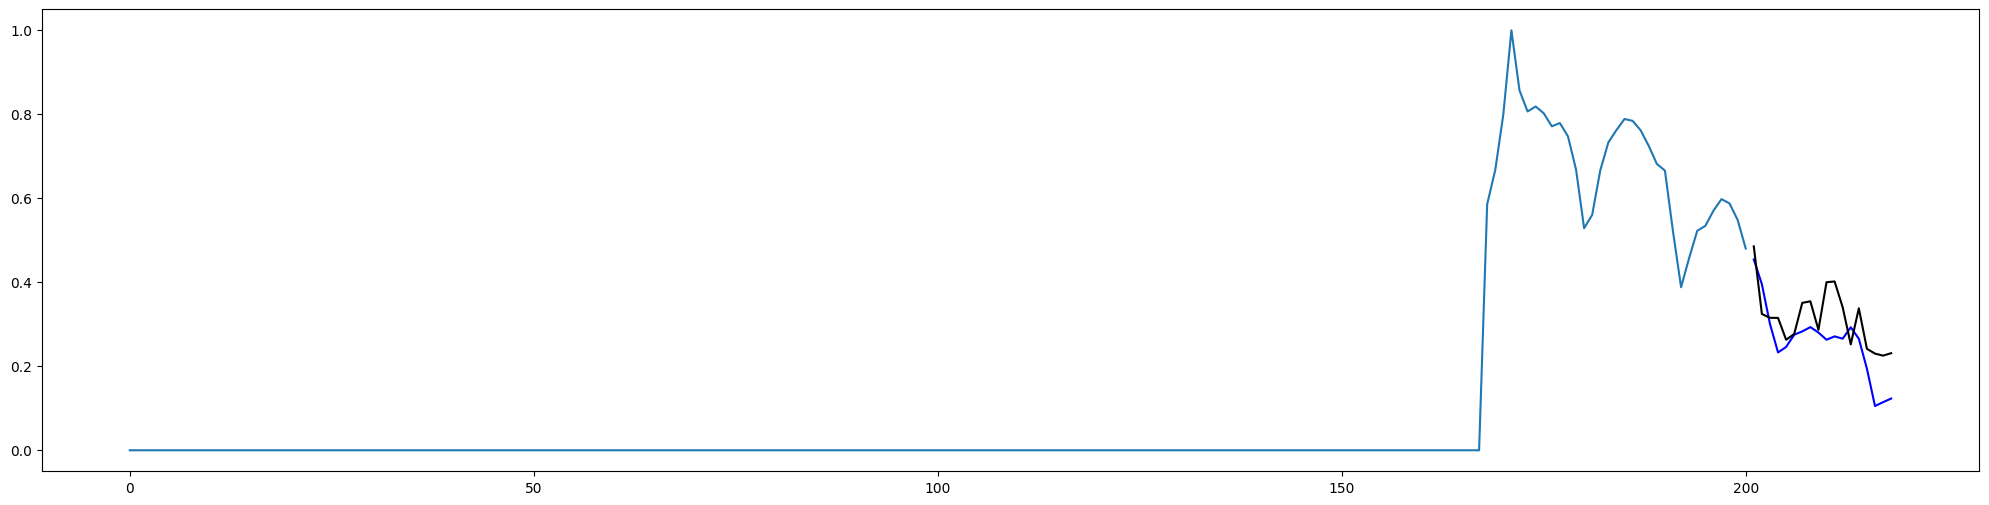

In [7]:
sample = np.random.randint(label.sum()-1)

data = datas[label][sample]
index = indexes[label][sample]
start = index[0]
end = index[1]


if (end - start) < (window +1+forecast_window):
    start_ = end - (window +1+forecast_window)
else:
    start_ = start

data = data[start_:end]
N = data.shape[0]



x_to_predict = data[-forecast_window-window:-forecast_window].reshape(1,window,1).copy()

x_to_predict = np.concatenate([x_to_predict,  encod.reshape(1,-1,1)],axis = 1)
prediction = model.predict(x_to_predict,verbose=False).flatten()


forecast_index = np.arange(forecast_window)+N-forecast_window

plt.figure(figsize = [25,6])
plt.plot(data[:-forecast_window])
plt.plot(forecast_index,data[-forecast_window:],'b')
plt.plot(forecast_index,prediction,'black')



In [ ]:
A = np.array([1,2,3,4])

In [22]:
A = np.array(range(0,))
window = 218
#-forecast_window-window:-forecast_window
A[-forecast_window-window:-forecast_window].reshape(1,window,1)

ValueError: cannot reshape array of size 182 into shape (1,218,1)